# Agregación de datos por categoría

In [66]:
import numpy as np
import pandas as pd

In [67]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [68]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender)) #choice() para que eliga un elemento aleatorio cada vez(Male o Female) y los meta en la lista
    income_data.append(np.random.choice(income))

In [69]:
gender_data[1:10]

['Male',
 'Female',
 'Female',
 'Female',
 'Female',
 'Female',
 'Male',
 'Male',
 'Female']

In [70]:
income_data[1:10]

['Middle Class',
 'Rich',
 'Rich',
 'Middle Class',
 'Rich',
 'Poor',
 'Middle Class',
 'Middle Class',
 'Rich']

In [71]:
# Z-test-> Z-Valor = Z = (X - mu) / (sd/sqrt(N)) -> N(0,1), X = mu + sd * Z 
# con N(media, desviacion tipica)= N(m,s)
#N(m, s) -> m + std * Z
height = 160 + 30 * np.random.randn(n) #160 de promedio y una desviacion de +/-30 cm
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n) #ingresos

In [72]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [73]:
data.head()

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,160.520448,37.068767,34.231793,19322.020077
1,Male,Middle Class,181.513242,34.197319,23.683872,18339.517755
2,Female,Rich,201.677009,38.528854,15.729144,18982.209390
3,Female,Rich,115.767324,68.449448,33.133210,21111.499604
4,Female,Middle Class,171.101492,54.216031,45.744582,19514.765376


## Agrupación de datos

In [79]:
grouped_gender = data.groupby("Gender")

In [10]:
grouped_gender.groups

{'Female': Int64Index([  0,   1,   2,   3,   5,   7,   8,   9,  12,  15,
             ...
             484, 487, 488, 489, 490, 491, 494, 496, 497, 499],
            dtype='int64', length=236),
 'Male': Int64Index([  4,   6,  10,  11,  13,  14,  16,  18,  19,  22,
             ...
             477, 478, 479, 483, 485, 486, 492, 493, 495, 498],
            dtype='int64', length=264)}

In [11]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

Female
     Gender Economic Status      Height      Weight        Age        Income
0    Female            Rich  179.384159   48.390582  29.679191  18783.029175
1    Female    Middle Class  215.628524   64.826521  23.112731  19307.167091
2    Female    Middle Class  137.220635   45.781568  35.960831  18615.262685
3    Female            Rich  122.013869   84.559211  31.035054  19089.065014
5    Female            Rich  148.182045  111.965586  37.823116  19598.388400
..      ...             ...         ...         ...        ...           ...
491  Female            Poor  119.834250   30.697477  52.486389  20090.876662
494  Female            Poor  160.648954   34.557700  37.295149  20508.049202
496  Female            Rich  149.415982   74.405670  31.268877  20820.968785
497  Female            Poor  195.836085   77.417289  30.892757  20399.578105
499  Female            Rich  132.952757   59.479615  30.223126  21167.686964

[236 rows x 6 columns]
Male
    Gender Economic Status      Height  

In [12]:
grouped_gender.get_group("Female")

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,179.384159,48.390582,29.679191,18783.029175
1,Female,Middle Class,215.628524,64.826521,23.112731,19307.167091
2,Female,Middle Class,137.220635,45.781568,35.960831,18615.262685
3,Female,Rich,122.013869,84.559211,31.035054,19089.065014
5,Female,Rich,148.182045,111.965586,37.823116,19598.388400
...,...,...,...,...,...,...
491,Female,Poor,119.834250,30.697477,52.486389,20090.876662
494,Female,Poor,160.648954,34.557700,37.295149,20508.049202
496,Female,Rich,149.415982,74.405670,31.268877,20820.968785
497,Female,Poor,195.836085,77.417289,30.892757,20399.578105


In [13]:
double_group = data.groupby(["Gender", "Economic Status"])

In [14]:
len(double_group)

6

In [15]:
for names, groups in double_group:
    print(names)
    print(groups)

('Female', 'Middle Class')
     Gender Economic Status      Height      Weight        Age        Income
1    Female    Middle Class  215.628524   64.826521  23.112731  19307.167091
2    Female    Middle Class  137.220635   45.781568  35.960831  18615.262685
15   Female    Middle Class  140.479760   89.588595  42.164207  19839.521828
20   Female    Middle Class  167.862147   35.222326  22.666069  19760.007781
21   Female    Middle Class  152.573385   36.898682  23.924797  21147.225544
..      ...             ...         ...         ...        ...           ...
475  Female    Middle Class  122.335028   57.951611  27.051454  20276.001977
480  Female    Middle Class  156.983827   89.853400  57.235638  20205.805734
481  Female    Middle Class  138.634699   53.226334  40.068001  18587.287547
484  Female    Middle Class  148.832675  115.519808  45.821173  19073.402834
489  Female    Middle Class  209.500813   63.301888  30.370432  19543.166576

[82 rows x 6 columns]
('Female', 'Poor')
     Ge

## Operaciones sobre datos agrupados

In [16]:
double_group.sum()

Height       Weight          Age        Income
Gender Economic Status                                                      
Female Middle Class     12827.923201  5122.980950  2442.820114  1.619748e+06
       Poor             14198.727493  5097.116064  2592.211461  1.709994e+06
       Rich             10862.657334  4410.860640  2064.527318  1.310931e+06
Male   Middle Class     13414.670839  5397.710350  2318.645397  1.593160e+06
       Poor             14401.020342  5881.264116  2528.732202  1.752147e+06
       Rich             14763.509175  6041.245983  2797.406980  1.845919e+06

In [17]:
double_group.mean()

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     156.438088  62.475377  29.790489  19753.026788
       Poor             163.203764  58.587541  29.795534  19655.106423
       Rich             162.129214  65.833741  30.813841  19566.127531
Male   Middle Class     165.613220  66.638399  28.625252  19668.635959
       Poor             161.809217  66.081619  28.412721  19687.045316
       Rich             157.058608  64.268574  29.759649  19637.438269

In [18]:
double_group.size()

Gender  Economic Status
Female  Middle Class       82
        Poor               87
        Rich               67
Male    Middle Class       81
        Poor               89
        Rich               94
dtype: int64

In [19]:
double_group.describe() #nos saca la descripcion de cada columna agrupados por genero y clase social

Height                                                 \
                        count        mean        std         min         25%   
Gender Economic Status                                                         
Female Middle Class      82.0  156.438088  29.193323   81.659331  140.712849   
       Poor              87.0  163.203764  28.452013  107.150165  144.624002   
       Rich              67.0  162.129214  30.426290   92.065024  137.410316   
Male   Middle Class      81.0  165.613220  26.693057  106.562050  144.705080   
       Poor              89.0  161.809217  33.808902   82.699744  140.839175   
       Rich              94.0  157.058608  31.707114   75.862868  134.576500   

                                                           Weight             \
                               50%         75%         max  count       mean   
Gender Economic Status                                                         
Female Middle Class     153.864507  176.420555  221.203644   82.0  62.475377   
       Poor             163.188594  184.970737  252.926666   87.0  58.587541   
       Rich             164.010693  178.962563  221.397326   67.0  65.833741   
Male   Middle Class     160.362986  188.043995  235.432455   81.0  66.638399   
       Poor             159.342058  188.820382  235.670224   89.0  66.081619   
       Rich             160.520570  179.020084  227.309165   94.0  64.268574   

                        ...        Age            Income                \
                        ...        75%        max  count          mean   
Gender Economic Status  ...                                              
Female Middle Class     ...  38.759268  62.959152   82.0  19753.026788   
       Poor             ...  39.267444  58.087456   87.0  19655.106423   
       Rich             ...  36.484785  52.838108   67.0  19566.127531   
Male   Middle Class     ...  36.289875  64.586055   81.0  19668.635959   
       Poor             ...  36.809566  61.157445   89.0  19687.045316   
       Rich             ...  37.112322  65.395112   94.0  19637.438269   

                                                                               \
                                std           min           25%           50%   
Gender Economic Status                                                          
Female Middle Class      985.479565  18089.101774  18844.825383  19718.733713   
       Poor              938.523302  18011.007196  18850.406062  19671.740292   
       Rich             1067.523212  18016.337270  18749.911035  19476.517885   
Male   Middle Class      998.604690  18027.324681  18854.403992  19574.603454   
       Poor             1027.331510  18027.353799  18901.161590  19640.267576   
       Rich             1035.427773  18031.599566  18799.426852  19416.456775   

                                                    
                                 75%           max  
Gender Economic Status                              
Female Middle Class     20560.290328  21460.655761  
       Poor             20459.953536  21467.555825  
       Rich             20569.084090  21473.913462  
Male   Middle Class     20403.335367  21456.655796  
       Poor             20657.421899  21461.965060  
       Rich             20528.773382  21461.092516  

[6 rows x 32 columns]

In [20]:
grouped_income = double_group["Income"] #nos quedmoas solo con la columna Income

In [21]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      82.0  19753.026788   985.479565  18089.101774   
       Poor              87.0  19655.106423   938.523302  18011.007196   
       Rich              67.0  19566.127531  1067.523212  18016.337270   
Male   Middle Class      81.0  19668.635959   998.604690  18027.324681   
       Poor              89.0  19687.045316  1027.331510  18027.353799   
       Rich              94.0  19637.438269  1035.427773  18031.599566   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     18844.825383  19718.733713  20560.290328  21460.655761  
       Poor             18850.406062  19671.740292  20459.953536  21467.555825  
       Rich             18749.911035  19476.517885  20569.084090  21473.913462  
Male   Middle Class     18854.403992  19574.603454  20403.335367  21456.655796  
       Poor             18901.161590  19640.267576  20657.421899  21461.965060  
       Rich             18799.426852  19416.456775  20528.773382  21461.092516

In [22]:
double_group.aggregate( 
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.619748e+06  29.790489  29.193323
       Poor             1.709994e+06  29.795534  28.452013
       Rich             1.310931e+06  30.813841  30.426290
Male   Middle Class     1.593160e+06  28.625252  26.693057
       Poor             1.752147e+06  28.412721  33.808902
       Rich             1.845919e+06  29.759649  31.707114

In [23]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.790489  5.391671
       Poor             29.795534  5.769359
       Rich             30.813841  5.368806
Male   Middle Class     28.625252  6.243012
       Poor             28.412721  4.813111
       Rich             29.759649  4.979979

In [24]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     12827.923201  156.438088  29.193323  5122.980950   
       Poor             14198.727493  163.203764  28.452013  5097.116064   
       Rich             10862.657334  162.129214  30.426290  4410.860640   
Male   Middle Class     13414.670839  165.613220  26.693057  5397.710350   
       Poor             14401.020342  161.809217  33.808902  5881.264116   
       Rich             14763.509175  157.058608  31.707114  6041.245983   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     62.475377  27.054219  2442.820114  29.790489   
       Poor             58.587541  23.796950  2592.211461  29.795534   
       Rich             65.833741  19.821473  2064.527318  30.813841   
Male   Middle Class     66.638399  23.833221  2318.645397  28.625252   
       Poor             66.081619  18.741793  2528.732202  28.412721   
       Rich             64.268574  24.539300  2797.406980  29.759649   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.269972  1.619748e+06  19753.026788   985.479565  
       Poor             13.971196  1.709994e+06  19655.106423   938.523302  
       Rich             10.149881  1.310931e+06  19566.127531  1067.523212  
Male   Middle Class     12.504818  1.593160e+06  19668.635959   998.604690  
       Poor             12.739176  1.752147e+06  19687.045316  1027.331510  
       Rich             11.279860  1.845919e+06  19637.438269  1035.427773

In [25]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.391671  2.323477  2.258770  20.167425
       Poor             5.769359  2.476249  2.145003  21.063995
       Rich             5.368806  3.346401  3.058794  18.466857
Male   Middle Class     6.243012  2.813451  2.303401  19.818837
       Poor             4.813111  3.545873  2.242979  19.271859
       Rich             4.979979  2.633049  2.652446  19.067224

## Filtrado de datos

In [26]:
# Nos quedamos con las personas cuya suma de edad supere los 2400
# (clasificados por clase y genero dados por double group)
double_group["Age"].filter(lambda x: x.sum()>2400)

1      23.112731
2      35.960831
4      50.661599
6       8.540923
7       5.667099
         ...    
493    27.992714
494    37.295149
495    -2.713157
497    30.892757
498    54.444119
Name: Age, Length: 352, dtype: float64

## Transformación de variables

In [27]:
zscore = lambda x : (x - x.mean())/x.std() #donde x simboliza cada valor de una columna

In [28]:
z_group = double_group.transform(zscore)

In [29]:
import matplotlib.pyplot as plt

(array([  3.,  14.,  46.,  83., 128., 114.,  67.,  33.,   8.,   4.]),
 array([-2.9764706 , -2.36290238, -1.74933416, -1.13576593, -0.52219771,
         0.09137051,  0.70493873,  1.31850696,  1.93207518,  2.5456434 ,
         3.15921162]),
 <a list of 10 Patch objects>)

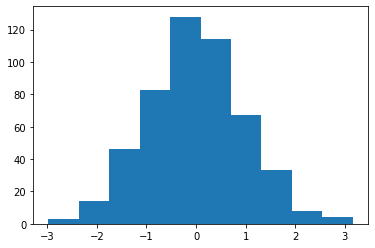

In [30]:
plt.hist(z_group["Age"])

In [31]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [32]:
double_group.transform(fill_na_mean) ##rellenamos los NA por el promedio

,Height,Weight,Age,Income
0,179.384159,48.390582,29.679191,18783.029175
1,215.628524,64.826521,23.112731,19307.167091
2,137.220635,45.781568,35.960831,18615.262685
3,122.013869,84.559211,31.035054,19089.065014
4,122.056816,45.787904,50.661599,18731.312864
...,...,...,...,...
495,131.033259,60.139214,-2.713157,21401.514995
496,149.415982,74.405670,31.268877,20820.968785
497,195.836085,77.417289,30.892757,20399.578105
498,226.433569,61.421438,54.444119,19117.751856


## Operaciones diversas muy útiles

In [33]:
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Female,Rich,179.384159,48.390582,29.679191,18783.029175
1,Female,Middle Class,215.628524,64.826521,23.112731,19307.167091
4,Male,Rich,122.056816,45.787904,50.661599,18731.312864
6,Male,Poor,211.509540,40.570750,8.540923,18779.223141
7,Female,Poor,161.074346,27.093030,5.667099,19925.307886
13,Male,Middle Class,196.004937,33.537730,36.421155,19081.525683


In [34]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
478,Male,Middle Class,155.807333,68.009822,34.719527,19566.780226
489,Female,Middle Class,209.500813,63.301888,30.370432,19543.166576
493,Male,Rich,152.642201,90.487763,27.992714,18584.263633
497,Female,Poor,195.836085,77.417289,30.892757,20399.578105
498,Male,Poor,226.433569,61.421438,54.444119,19117.751856
499,Female,Rich,132.952757,59.479615,30.223126,21167.686964


In [35]:
double_group.nth(32) #para que que nos saque elementos intermedios entre la cabecera y la cola

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     170.952327  95.021647  19.339013  18556.542707
       Poor             162.106536  70.220708   8.748839  18565.288090
       Rich             176.210559  60.183913  31.629989  21362.290204
Male   Middle Class     135.263205  76.082410  35.625787  20824.741051
       Poor             119.956946  58.071114  24.022960  18027.353799
       Rich             168.437102  72.957325  27.016835  18944.196499

In [36]:
double_group.nth(82)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Poor             165.496390   34.323471  50.306415  19063.833187
Male   Poor             160.451590   96.120598  17.582832  18901.161590
       Rich             143.147279  104.303968  12.415817  18634.873533

In [37]:
data_sorted = data.sort_values(["Age", "Income"]) #primero se ordena por edad y luego por nivel de ingresos

In [38]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
495,Male,Poor,131.033259,60.139214,-2.713157,21401.514995
8,Female,Poor,166.244291,35.182508,-1.646117,18980.844900
381,Male,Middle Class,141.635987,83.357615,0.353248,18276.016330
221,Male,Poor,189.290767,62.614182,0.379400,20897.122461
289,Female,Middle Class,101.627894,36.641632,0.445226,21196.122778
136,Female,Rich,156.440062,50.813161,0.603017,19011.857984
432,Male,Poor,163.635016,59.427637,0.879053,20525.172682
320,Male,Middle Class,185.602956,85.910846,1.087035,20368.504453
96,Female,Poor,144.880212,71.847852,2.659128,20839.403398
319,Male,Middle Class,141.213062,31.342653,4.417290,19310.339228


In [39]:
age_grouped = data_sorted.groupby("Gender")

In [40]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
495,Male,Poor,131.033259,60.139214,-2.713157,21401.514995
8,Female,Poor,166.244291,35.182508,-1.646117,18980.844900


In [41]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
266,Female,Middle Class,186.593587,67.832335,62.959152,20132.651521
217,Male,Rich,182.095159,23.705374,65.395112,19782.937978


# Conjunto de entrenamiento y conjunto de testing

In [42]:
import pandas as pd

In [43]:
data = pd.read_csv("../datasets/customer-churn-model/Customer Churn Model.txt")

In [44]:
len(data)

3333

## 1ª forma: Dividir utilizando la distribución normal

In [45]:
a = np.random.randn(len(data)) #queremos 3333 elementos entre 0 y 1

(array([ 17.,  64., 204., 523., 826., 820., 534., 261.,  67.,  17.]),
 array([-3.28163489, -2.63259572, -1.98355654, -1.33451736, -0.68547818,
        -0.03643901,  0.61260017,  1.26163935,  1.91067852,  2.5597177 ,
         3.20875688]),
 <a list of 10 Patch objects>)

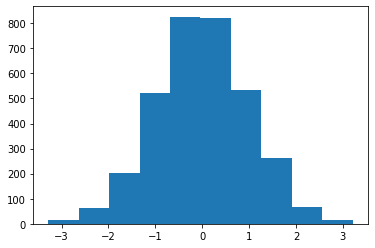

In [46]:
plt.hist(a)

In [47]:
check = (a<0.75) #En este caso queremos el 75% de los datos para entrenar y el resto para testear el modelo

In [48]:
check

array([False,  True,  True, ..., False,  True,  True])

(array([ 734.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2599.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

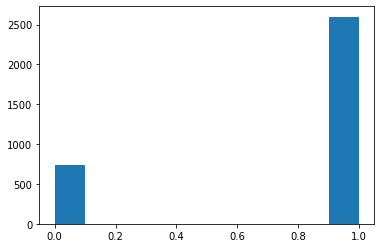

In [49]:
plt.hist(check*1)

In [50]:
training = data[check] #pillamos para entrenar los datos que cumplen True en la variable check de arriba
testing = data[~check] #pillamos para testear los False de check

In [51]:
len(training)

2599

In [52]:
len(testing)

734

## 2ª forma: Con la libreria sklearn

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
train, test = train_test_split(data, test_size = 0.2) #20% para testear(0.2)

In [55]:
len(train)

2666

In [56]:
len(test)

667

## 3ª forma: Usando una función de shuffle

In [57]:
import numpy as np

In [58]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [59]:
import sklearn

In [60]:
data = sklearn.utils.shuffle(data) #con schuffle mezclamos las columnas del data

In [61]:
cut_id = int(0.75*len(data)) #el 75% de data va para entrenamiento del modelo 
train_data = data[:cut_id]
test_data = data[cut_id+1:] #el resto de 75% va para testing

In [62]:
len(train_data)

2499

In [63]:
len(test_data)

833